# Import the data set
First, let's import pandas (for visualization) and read the csv file for the data set of arrests in the neighborhoods

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

arrests_data = pd.read_csv('arrests.csv', low_memory = False)
arrests_data.head()

,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
0,1,Adult Arrest-On View,PGHP25000026,b09e1066-c355-cc1b-218c-08dd2a4354ea,1/1/2025,2025.0,Jan,4:04,On-View Arrest (apprehension without a warrant...,21.0,...,Group B,B,18 5503 A1* Disorderly Conduct-Fighting/Threat...,Zone 3,1702.0,South Side Flats,MISDEMEANOR - M3,-79.9824,40.4288,"1600 Block of E Carson Street Pittsburgh, PA"
1,2,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,1/1/2025,2025.0,Jan,3:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
2,3,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,1/1/2025,2025.0,Jan,3:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A2II Illegal Park W/I 15 Feet of Fire ...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
3,4,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,1/1/2025,2025.0,Jan,3:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A3II Illegal Park Where Official Signs...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
4,5,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,1/1/2025,2025.0,Jan,3:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A1III Illegal Park In Intersection,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...


# Filter the 3 data sets
Next we filter the 3 data sets so that we are only looking at neighborhoods that have data in all sets and removing any values of NaN, or any condition values that equal "Dead" from the trees data set

In [30]:
trees_data = pd.read_csv('tree.csv', low_memory = False)
sports_data = pd.read_csv('sports.csv', low_memory = False)
arrests_data = pd.read_csv('arrests.csv', low_memory = False)

name_column = 'Neighborhood'

trees_of_heaven = trees_data[
    (trees_data['common_name'].str.contains("Tree-of-Heaven", case = False, na = False)) & 
    (trees_data['condition'] != 'Dead')
].copy()

neighborhoods_with_toh = set(trees_of_heaven[name_column].dropna().unique())

common_names = neighborhoods_with_toh & set(sports_data[name_column]) & set(arrests_data[name_column])

trees_common = trees_of_heaven[trees_of_heaven[name_column].isin(common_names)].copy()
sports_common = sports_data[sports_data[name_column].isin(common_names)].copy()
arrests_common = arrests_data[arrests_data[name_column].isin(common_names)].copy()

# Rank the neighborhoods
Then we can sort and rank the neighborhoods by the number of crimes in each neighborhood

In [50]:
arrests_by_neighborhood = arrests_common[name_column].value_counts().reset_index()
arrests_by_neighborhood.columns = ['Neighborhood', 'Count']
arrests_by_neighborhood = arrests_by_neighborhood.sort_values('Count', ascending = False)

arrests_10 = arrests_by_neighborhood.tail(10)

print("\n" + "="*40)
print("        ARRESTS BY NEIGHBORHOOD")
print("="*40)
print(arrests_10.to_string(index = False))
print("="*40)


        ARRESTS BY NEIGHBORHOOD
         Neighborhood  Count
        Homewood West    140
Central Lawrenceville    124
        Lincoln Place    112
         Point Breeze     95
             Fineview     87
      Stanton Heights     83
           Upper Hill     58
  Upper Lawrenceville     49
          Morningside     36
        Regent Square     23


# Number of each type of charge in each neighborhood
For a little extra data we can sort the number of charges in each neighborhood to see the level of severity of the neighborhoods crimes

In [49]:
arrests_common['Offense_Category'] = arrests_common['ArrestCharge_Felony_Misdemeanor_Description'].str.split(' - ').str[0]
arrests_by_neighborhood = arrests_common.groupby(['Neighborhood', 'Offense_Category']).size().reset_index(name = 'Number of Arrests')

pivot_table = arrests_common.pivot_table(
    index = 'Neighborhood', 
    columns = 'Offense_Category',
    values = 'ArrestCharge_Felony_Misdemeanor_Description',
    aggfunc = 'count',
    fill_value = 0
)

pivot_table = pivot_table.sort_values('FELONY', ascending = False)
pivot_table_10 = pivot_table.tail(10)

print("\n" + "="*60)
print("        ARRESTS (OFFENSE CATEGORY) BY NEIGHBORHOOD")
print("="*60)
print(pivot_table_10.to_string())
print("="*60)


        ARRESTS (OFFENSE CATEGORY) BY NEIGHBORHOOD
Offense_Category       FELONY  INFRACTION  MISDEMEANOR
Neighborhood                                          
Fineview                   16           9           53
Lincoln Place              16          20           60
Point Breeze               16          25           37
Central Lawrenceville      15          19           66
Upper Hill                 13           5           32
Greenfield                 13          45           92
Stanton Heights            12          20           27
Upper Lawrenceville         7           7           21
Morningside                 6           8           17
Regent Square               2           7            9


# Better Visual

AttributeError: 'Axes' object has no attribute 'tight_layout'

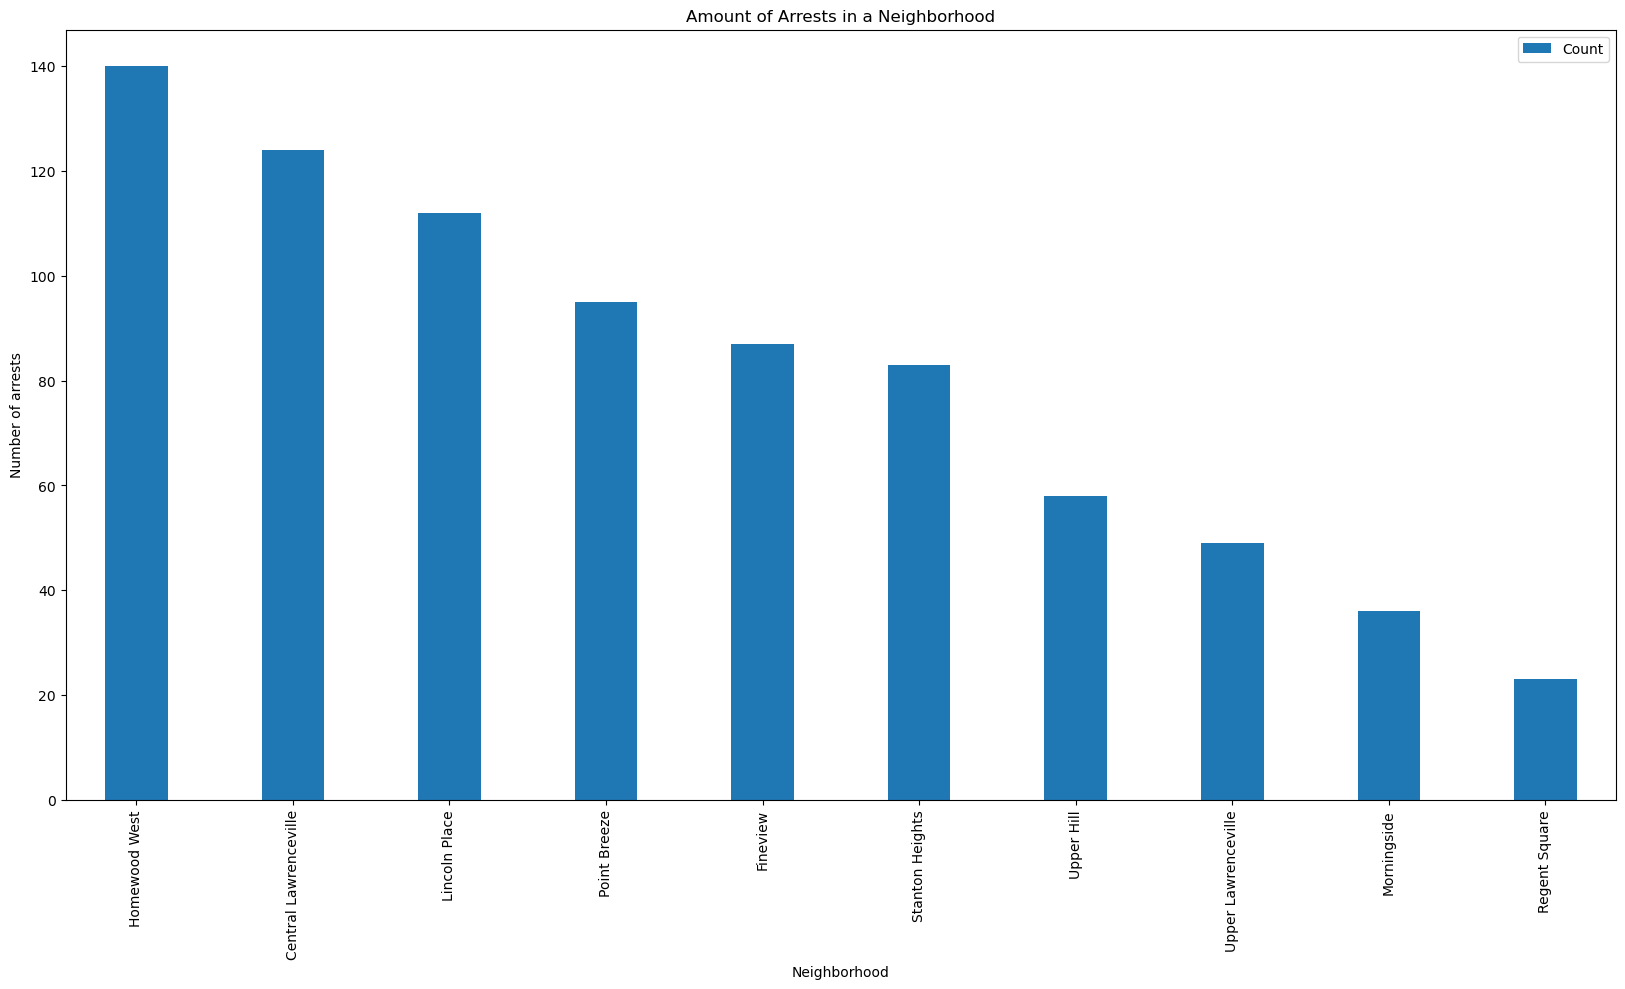

In [51]:
arrests_by_neighborhood = arrests_common[name_column].value_counts().reset_index()
arrests_by_neighborhood.columns = ['Neighborhood', 'Count']
arrests_by_neighborhood = arrests_by_neighborhood.sort_values('Count', ascending = False)
arrests_10 = arrests_by_neighborhood.tail(10)

arrests_plt = arrests_10.plot(x = 'Neighborhood', y = 'Count', kind = 'bar', width = .4, figsize = (20, 10))
arrests_plt.set_xlabel('Neighborhood')
arrests_plt.set_ylabel('Number of arrests')
arrests_plt.set_title('Amount of Arrests in a Neighborhood')
arrests_plt.tight_layout()
arrests_plt.show()